In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
import json
from bs4 import BeautifulSoup
import geopy
from geopy.geocoders import Nominatim
#from google.colab import wrangle_zillow_data

In [21]:
#!cp /content/drive/MyDrive/wrangle_zillow_data.py

# 1. Goal

What are the best locations in North Carolina (NC) to buy a home/condo? 
What are the best home/condo options in the selected areas? 

# 2. Criteria for finding best location

https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp

- Stable real-estate value appreciation
 - Look at historical housing market appreciation (10 years after 2008 crash)
- Look at increase in population over the past 5 years
- Look at the number of new houses in the area
- Look at number of new companies moving into an area 
- Look at the number of universities and schools in the area
- Look at the number of airports in the area
- Look at the number of restaurants, bars, coffee shops, retailers in the area

# 3. Criteria for finding the best home/condo? 

- Condo
- Price below 500k
- At least 2 bedrooms
- HOA fees below $1000/month

# 4. What determines the price of a house? 

https://www.opendoor.com/w/blog/factors-that-influence-home-value

1. Neighborhood comps
2. Location
3. Home size and usable space
4. Age and condition
5. Upgrades and updates
6. Local market
7. Economic indicators
8. Interest rates


# 5. Real estate data sources


# 6. Neighborhoods in Durham

1. What are the best neighborhoods in Durham in terms for investment and rental properties? 
2. How do the neighborhoods in Durham compare to ones in other major cities such as Raleigh, Chapel Hill, Morrisville, Cary, Charlotte, Greensboro and Winston-Salem? 
3. How do the best neighborhoods in Durham compare to the best neighborhoods in other states? 

## 6.1 Extract neighborhood names in Durham

- https://durhamhoods.com/

In [ ]:
#Retrieving XML response containing Durham neighborhoods information
url = "https://durhamhoods.com/"
response = requests.get(url)
bs = BeautifulSoup(response.content,'lxml')
#search = bs.find_all('li')

#Extracting data in 'ul' tag which contains neighborhood names
ul_list = bs.find_all('ul')

data = []

for item in ul_list: 
  if item.get('class'):
    if "blogroll" in item.get('class'):
      data = item
    else: 
      continue

#Extracting individual neighborhoods and storing them in a list
li_list = data.find_all('li')

neighborhoods = []

for item in li_list: 
  neighborhoods.append(item.find('a').text)

print (neighborhoods)

['Abercromby', 'Abron Drive', 'Albright', 'Amberlynn Valley', 'American Tobacco Campus', 'American Village', 'Anderson St. / Wrightwood Park', 'Archer Woods', 'Arrowhead', 'Artisan at Brightleaf', 'Ashley Forest', 'Ashton Hall', 'Auburn', 'Auburn Hills', 'Auburn Park', 'Auburn Square', 'Audubon Park', 'Autumn Ridge', 'Bahama', 'Barclay to Sandlewood', 'Belcrest', 'Bennet Place', 'Bent Creek / Woodberry Forest', 'Bluffs of the Eno', 'Bon Air Avenue', 'Bradbury Glen', 'Bradbury Trace', 'Bradford', 'Bragtown', 'Brandon Ridge', 'Briarcliff', 'Brightleaf at the Park', 'Brightwood Trails', 'Brookstown', 'Buck Crossing', 'Burch Avenue', 'Cameron Woods', 'Cardinal Lake', 'Carillon Forest', 'Carolina Arbors', 'Central Park', "Chancellor's Ridge", 'Chapel Hill Road', 'Chelsea Meadows', 'Cleveland Holloway', 'Colchester', 'Cole Mill Road', 'Coles Pond', 'College View', 'Colonial Village', 'Colony Hill', 'Colony Park', 'Colony Woods', 'Colvard Farms', 'Copper Creek', 'Country Club Heights', 'Cranf

## 6.2 Retrieve geographical coordinates for each neighborhood

In [ ]:
#Extracting sample coordinates for a given location
address = 'Abercromby, Durham, North Carolina'

geolocator = Nominatim(user_agent="geoapiExercises")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ',address,' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of  Abercromby, Durham, North Carolina  are 35.9305379, -78.8951339.


In [ ]:
#Finding the coordinates for each neighborhood
lat = []
long = []
count = 0
good_returns = 0
bad_returns = 0
null_neighborhoods = []

for i in neighborhoods:
    location = geolocator.geocode(i.strip()+", Durham, North Carolina",timeout=10)
    try:
        good_returns = good_returns + 1
        latitude = location.latitude
        longitude = location.longitude
        lat.append(latitude)
        long.append(longitude)
        count = count + 1
        if count == 20:
          print ()
          print ("And so on....")
        elif count > 20: 
          pass
        else:
          print (i,latitude,longitude)
    except:
        null_neighborhoods.append(i)
        bad_returns = bad_returns + 1
        latitude = 998
        longitude = 999
        lat.append(latitude)
        long.append(longitude)
        count = count + 1
        if count == 20:
          print ()
          print ("And so on....")
        elif count > 20: 
          pass
        else:
          print (i,latitude,longitude)

print ()
print ("Number of neighborhoods for which the coordinates were successfully found:",good_returns)
print ("Number of neighborhoods for which the coordinates were not found:",bad_returns)
print ()
print ("These are the neighborhoods missing coordinates:")

for i in null_neighborhoods:
  print(i) 

Abercromby 35.9305379 -78.8951339
Abron Drive 35.8980667 -78.9490205
Albright 998 999
Amberlynn Valley 998 999
American Tobacco Campus 35.99479205 -78.90463781810374
American Village 36.0197482 -78.9711834
Anderson St. / Wrightwood Park 35.9888115 -78.93422273516074
Archer Woods 36.0448831 -78.9706922
Arrowhead 35.9992575 -78.9860774
Artisan at Brightleaf 998 999
Ashley Forest 998 999
Ashton Hall 998 999
Auburn 35.917257500000005 -78.9136132208005
Auburn Hills 35.9128978 -78.9100317
Auburn Park 35.9150128 -78.9134742
Auburn Square 35.9155897 -78.9160264
Audubon Park 35.8805154 -78.9041442
Autumn Ridge 36.085813 -78.939613
Bahama 36.1659763 -78.8766738

And so on....

Number of neighborhoods for which the coordinates were successfully found: 239
Number of neighborhoods for which the coordinates were not found: 53

These are the neighborhoods missing coordinates:
Albright
Amberlynn Valley
Artisan at Brightleaf
Ashley Forest
Ashton Hall
Belcrest
Bennet Place
Bent Creek / Woodberry Forest


In [ ]:
#Storing neighborhoods and coordinates in a dataframe
df_neighborhoods = pd.DataFrame()
df_neighborhoods['neighborhood'] = neighborhoods
df_neighborhoods['latitude'] = lat
df_neighborhoods['longitude'] = long
df_neighborhoods.head()

,neighborhood,latitude,longitude
0,Abercromby,35.930538,-78.895134
1,Abron Drive,35.898067,-78.949021
2,Albright,998.000000,999.000000
3,Amberlynn Valley,998.000000,999.000000
4,American Tobacco Campus,35.994792,-78.904638


In [ ]:
#Creating a new dataframe without the missing coordinates
df_plot = df_neighborhoods[df_neighborhoods['latitude']!=998]
df_plot.index = list(range(df_plot.shape[0]))
df_plot.shape

(186, 3)

Text(0.5, 1.0, 'Mapping of neighborhood names and coordinates')

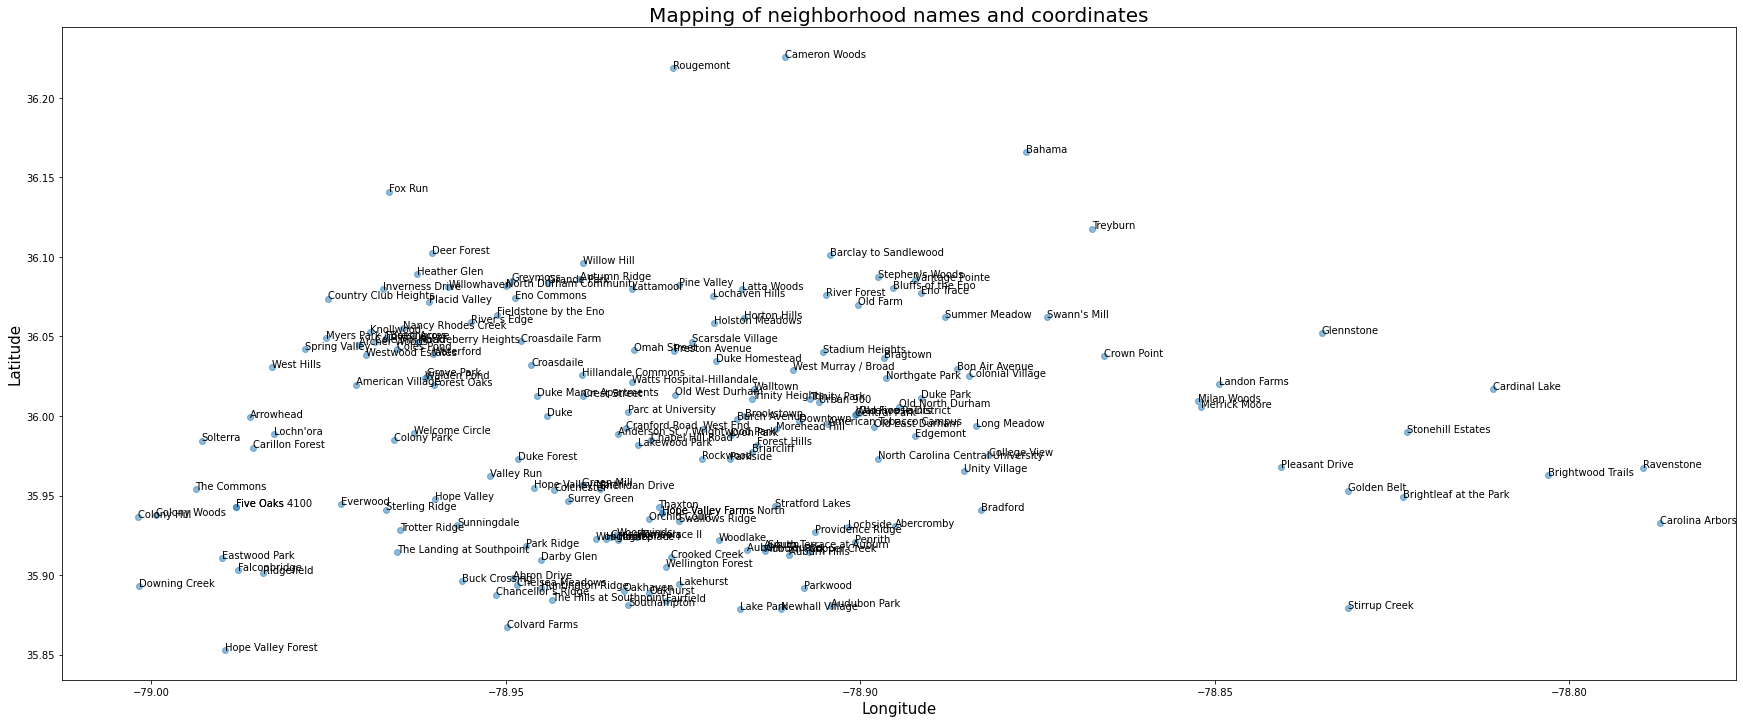

In [ ]:
plt.figure(figsize=(30,12))
plt.scatter(df_plot['longitude'],df_plot['latitude'],alpha=0.5)
for i in df_plot.index:
  plt.annotate(df_plot['neighborhood'].iloc[i],xy=(df_plot['longitude'].iloc[i],df_plot['latitude'].iloc[i]),xytext=(df_plot['longitude'].iloc[i],df_plot['latitude'].iloc[i]))
plt.xlabel('Longitude',size=15)
plt.ylabel('Latitude',size=15)
plt.title('Mapping of neighborhood names and coordinates',size=20)

# 7. Analyzing Global Housing Prices

### 7.1 Loading dataset from the OECD website

- https://data.oecd.org/price/housing-prices.htm

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Global_Housing_Prices.csv')
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HOUSECOST,NOMINAL,IDX2015,A,1970,2.552380,NaN
1,AUS,HOUSECOST,NOMINAL,IDX2015,A,1971,2.851352,NaN
2,AUS,HOUSECOST,NOMINAL,IDX2015,A,1972,3.183667,NaN
3,AUS,HOUSECOST,NOMINAL,IDX2015,A,1973,3.837183,NaN
4,AUS,HOUSECOST,NOMINAL,IDX2015,A,1974,4.690199,NaN


### 7.2 Filtering dataset by USA, real prices and quarterly frequency

In [4]:
df_usa = df[(df['LOCATION']=='USA') & (df['SUBJECT']=='REAL') & (df['FREQUENCY']=='Q')]
df_usa

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
31799,USA,HOUSECOST,REAL,IDX2015,Q,1970-Q1,55.513853,NaN
31800,USA,HOUSECOST,REAL,IDX2015,Q,1970-Q2,55.313669,NaN
31801,USA,HOUSECOST,REAL,IDX2015,Q,1970-Q3,55.810157,NaN
31802,USA,HOUSECOST,REAL,IDX2015,Q,1970-Q4,56.063154,NaN
31803,USA,HOUSECOST,REAL,IDX2015,Q,1971-Q1,56.607921,NaN
...,...,...,...,...,...,...,...,...
32003,USA,HOUSECOST,REAL,IDX2015,Q,2021-Q1,134.455823,NaN
32004,USA,HOUSECOST,REAL,IDX2015,Q,2021-Q2,139.180015,NaN
32005,USA,HOUSECOST,REAL,IDX2015,Q,2021-Q3,143.210862,NaN
32006,USA,HOUSECOST,REAL,IDX2015,Q,2021-Q4,146.064239,NaN


In [5]:
df_usa['TIME'] = df_usa['TIME'].apply(pd.to_datetime)
df_usa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
31799,USA,HOUSECOST,REAL,IDX2015,Q,1970-01-01,55.513853,NaN
31800,USA,HOUSECOST,REAL,IDX2015,Q,1970-04-01,55.313669,NaN
31801,USA,HOUSECOST,REAL,IDX2015,Q,1970-07-01,55.810157,NaN
31802,USA,HOUSECOST,REAL,IDX2015,Q,1970-10-01,56.063154,NaN
31803,USA,HOUSECOST,REAL,IDX2015,Q,1971-01-01,56.607921,NaN
...,...,...,...,...,...,...,...,...
32003,USA,HOUSECOST,REAL,IDX2015,Q,2021-01-01,134.455823,NaN
32004,USA,HOUSECOST,REAL,IDX2015,Q,2021-04-01,139.180015,NaN
32005,USA,HOUSECOST,REAL,IDX2015,Q,2021-07-01,143.210862,NaN
32006,USA,HOUSECOST,REAL,IDX2015,Q,2021-10-01,146.064239,NaN


# 8. Explore Zillow housing prices data

In [18]:
def filter_variables(df):
    #Filtering the dataset by the variables that are needed
    df = df[['RegionName','City','State','CountyName','SizeRank','2012-01','2017-06']]
    return df
    
def filter_nyc(df):
    #Filtering the dataset to only keep instances where the City is New York
    df = df[df['City']=='New York']
    return df
    
def filter_city_state(df,city,state):
    #Filtering the dataset by specific city and state
    df = df[(df['City']==city) & (df['State']==state)]
    return df
    
def rename_cols(df):
    #Renaming the columns to more readable names
    df = df.rename(columns={'RegionName':'ZipCode','2012-01':'Price2012','2017-06':'Price2017','CountyName':'County'})
    return df
    
def convert_zip_str(df):
    #Converting the values for the 'ZipCode' variable to string
    df['ZipCode'] = list(map(str,df['ZipCode']))
    return df

def add_price_metrics(df):
    #Creating new variables representing price increases from 2006 and 2012, respectively, to June 2017
    df['PriceIncrease'] = df['Price2017'] - df['Price2012']
    df['PriceIncreasePerc'] = ((df['Price2017'] - df['Price2012'])/df['Price2012'])*100
    df['PriceIncreaseYearly'] = df['PriceIncrease']/5
    return df

### 8.1 Loading dataset

In [13]:
df_zillow = pd.read_csv('/content/drive/MyDrive/Zip_Zhvi_2bedroom.csv')
df_zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61627,10013,New York,NY,New York,New York,1744,NaN,NaN,NaN,...,3347100,3305500,3261100,3244000.0,3231400,3183300,3160200,3193500,3262200,3316500
1,61628,10014,New York,NY,New York,New York,379,NaN,NaN,NaN,...,2480800,2443200,2430100,2452900.0,2451200,2441900,2460900,2494900,2498400,2491600
2,61625,10011,New York,NY,New York,New York,15,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
3,97515,94024,Los Altos,CA,San Jose,Santa Clara,4335,419500.0,422300.0,430400.0,...,2330300,2302700,2269300,2263600.0,2279300,2302700,2321700,2351200,2371500,2378100
4,97519,94028,Portola Valley,CA,San Francisco,San Mateo,7158,NaN,NaN,NaN,...,2350800,2336500,2317200,2313800.0,2324200,2317300,2294500,2296300,2329400,2358300


### 8.2 Filtering the data to keep the most relevant housing prices and variables

The Zillow data consists of monthly housing prices over time (from 1996 to 2017) for 8946 zip codes across the United States. Below, we create a subset of the main dataset to include the following housing prices: 
- **January 2012**: 2nd reference price when the average housing price was lowest after the 2008 crash
- **June 2017**: Most recently recorded housing price

These years were selected based on the timeseries analysis shown below using the following methodology: 
1. The housing price for all zip codes are averaged across dates 
2. A timeseries plot of the averaged housing prices is generated

In [5]:
df_zillow_timeseries = df_zillow.drop(['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'],axis=1)
df_zillow_timeseries = df_zillow_timeseries.mean()
df_zillow_timeseries.index = pd.to_datetime(df_zillow_timeseries.index)

Text(0, 0.5, 'Average housing price ($)')

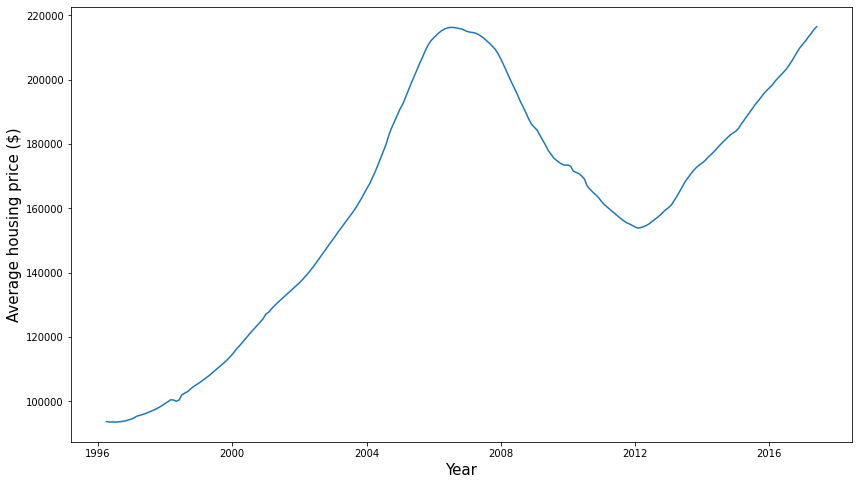

In [6]:
plt.figure(figsize=(14,8))
plt.plot(df_zillow_timeseries)
plt.xlabel('Year',size=15)
plt.ylabel('Average housing price ($)',size=15)

### 8.3 Dropping unneeded variables

In [14]:
df_zillow = filter_variables(df_zillow)
df_zillow.head()

,RegionName,City,State,CountyName,SizeRank,2012-01,2017-06
0,10013,New York,NY,New York,1744,2490300.0,3316500
1,10014,New York,NY,New York,379,1674800.0,2491600
2,10011,New York,NY,New York,15,1509600.0,2480400
3,94024,Los Altos,CA,Santa Clara,4335,1218000.0,2378100
4,94028,Portola Valley,CA,San Mateo,7158,1364000.0,2358300


### 8.4 Filtering only North Carolin RTP listings

Cities in the RTP: 
- Raleigh
- Durham
- Chapel Hill
- Morrisville
- Cary

Below, we filter the dataset to only include zip codes from New York, which actually represents the entire New York City area including the five buroughs. This was verified by individually checking whether the City variable for any of the instances contained the following buroughs: 
- Manhattan
- Brooklyn: There were three instances present but they were from states other than NY
- Bronx
- Queens
- Staten Island

In [15]:
df_zillow = df_zillow[(df_zillow['City']=='Morrisville') | (df_zillow['City']=='Durham') | (df_zillow['City']=='Raleigh') | (df_zillow['City']=='Chapel Hill') | 
                      (df_zillow['City']=='Cary') | (df_zillow['City']=='Greensboro') | (df_zillow['City']=='Winston-Salem') | (df_zillow['City']=='High Point')]
df_zillow = df_zillow[df_zillow['State']=='NC']
df_zillow.head()

,RegionName,City,State,CountyName,SizeRank,2012-01,2017-06
1377,27601,Raleigh,NC,Wake,6238,256200.0,332000
1664,27608,Raleigh,NC,Wake,5844,221100.0,298300
2500,27519,Cary,NC,Wake,504,176500.0,231200
2715,27605,Raleigh,NC,Wake,6674,174400.0,221300
2761,27517,Chapel Hill,NC,Orange,2700,184800.0,218700


In [16]:
df_zillow['City'].value_counts()[:30]

Raleigh          14
Greensboro       10
Winston-Salem     8
Durham            7
High Point        5
Cary              3
Chapel Hill       3
Morrisville       1
Name: City, dtype: int64

In [52]:
#Filtering the dataset by city and state
#arg1 -> dataframe
#arg2 -> city name
#arg3 -> state name initials. For example New York will be NY or Georgia will be GA. 
#df_zillow = filter_city_state(df_zillow,"Durham","NC")
#print (df_zillow.shape)
#df_zillow.head()

### 8.5 Renaming columns to make them more readable

In [19]:
df_zillow = rename_cols(df_zillow)
df_zillow.head()

,ZipCode,City,State,County,SizeRank,Price2012,Price2017
1377,27601,Raleigh,NC,Wake,6238,256200.0,332000
1664,27608,Raleigh,NC,Wake,5844,221100.0,298300
2500,27519,Cary,NC,Wake,504,176500.0,231200
2715,27605,Raleigh,NC,Wake,6674,174400.0,221300
2761,27517,Chapel Hill,NC,Orange,2700,184800.0,218700


### 8.6 Converting zipcode values to  string for easier manipulation

In [20]:
df_zillow = convert_zip_str(df_zillow)
df_zillow.head()

,ZipCode,City,State,County,SizeRank,Price2012,Price2017
1377,27601,Raleigh,NC,Wake,6238,256200.0,332000
1664,27608,Raleigh,NC,Wake,5844,221100.0,298300
2500,27519,Cary,NC,Wake,504,176500.0,231200
2715,27605,Raleigh,NC,Wake,6674,174400.0,221300
2761,27517,Chapel Hill,NC,Orange,2700,184800.0,218700


## 4.1 Creating new variable to record price increase (Zillow)

In [21]:
df_zillow = add_price_metrics(df_zillow)
df_zillow.head()

,ZipCode,City,State,County,SizeRank,Price2012,Price2017,PriceIncrease,PriceIncreasePerc,PriceIncreaseYearly
1377,27601,Raleigh,NC,Wake,6238,256200.0,332000,75800.0,29.586261,15160.0
1664,27608,Raleigh,NC,Wake,5844,221100.0,298300,77200.0,34.916327,15440.0
2500,27519,Cary,NC,Wake,504,176500.0,231200,54700.0,30.991501,10940.0
2715,27605,Raleigh,NC,Wake,6674,174400.0,221300,46900.0,26.892202,9380.0
2761,27517,Chapel Hill,NC,Orange,2700,184800.0,218700,33900.0,18.344156,6780.0


### 8.7 Data visualization

In [24]:
def uni_scatterplot(df,y_metric,ylabel):
    #Function used to create a univariate (1 variable) plot for a provided variable in the dataset
    #Inputs: dataframe, column name in dataframe, y-axis label
    plt.figure(figsize=(36,10))

    plt.subplot(1,2,1)
    sns.scatterplot(data=df,x=df.index,y=y_metric,hue='County',s=100)
    for i in range(len(df['ZipCode'])):
        plt.annotate(str(df['ZipCode'].iloc[i]),xy=(df.index[i]+0.15,df[y_metric].iloc[i]+0.15),xytext=(df.index[i]+0.15,df[y_metric].iloc[i]+0.15),size=12)
    plt.xlabel('Index',size=15)
    plt.ylabel(ylabel,size=15)

    plt.subplot(1,2,2)
    sns.scatterplot(data=df,x=df.index,y=y_metric,hue='City',s=100)
    for i in range(len(df['ZipCode'])):
        plt.annotate(str(df['ZipCode'].iloc[i]),xy=(df.index[i]+0.15,df[y_metric].iloc[i]+0.15),xytext=(df.index[i]+0.15,df[y_metric].iloc[i]+0.15),size=12)
    plt.xlabel('Index',size=15)
    plt.ylabel(ylabel,size=15)

    plt.show()

def bi_scatterplot(df,x_metric,y_metric,xlabel,ylabel):
    #Function used to create a bivariate plot for 2 variables in the dataset
    #Inputs: dataframe, x-axis column name, y-axis column name, x-axis label, y-axis label
    plt.figure(figsize=(36,10))

    plt.subplot(1,2,1)
    sns.scatterplot(data=df,x=x_metric,y=y_metric,hue='County')
    for i in range(len(df['ZipCode'])):
        plt.annotate(str(df['ZipCode'].iloc[i]),xy=(df[x_metric].iloc[i]+0.15,df[y_metric].iloc[i]+0.15),xytext=(df[x_metric].iloc[i]+0.15,df[y_metric].iloc[i]+0.15))
    plt.xlabel(xlabel,size=15)
    plt.ylabel(ylabel,size=15)

    plt.subplot(1,2,2)
    sns.scatterplot(data=df,x=x_metric,y=y_metric,hue='City')
    for i in range(len(df['ZipCode'])):
        plt.annotate(str(df['ZipCode'].iloc[i]),xy=(df[x_metric].iloc[i]+0.15,df[y_metric].iloc[i]+0.15),xytext=(df[x_metric].iloc[i]+0.15,df[y_metric].iloc[i]+0.15))
    plt.xlabel(xlabel,size=15)
    plt.ylabel(ylabel,size=15)

    plt.show()

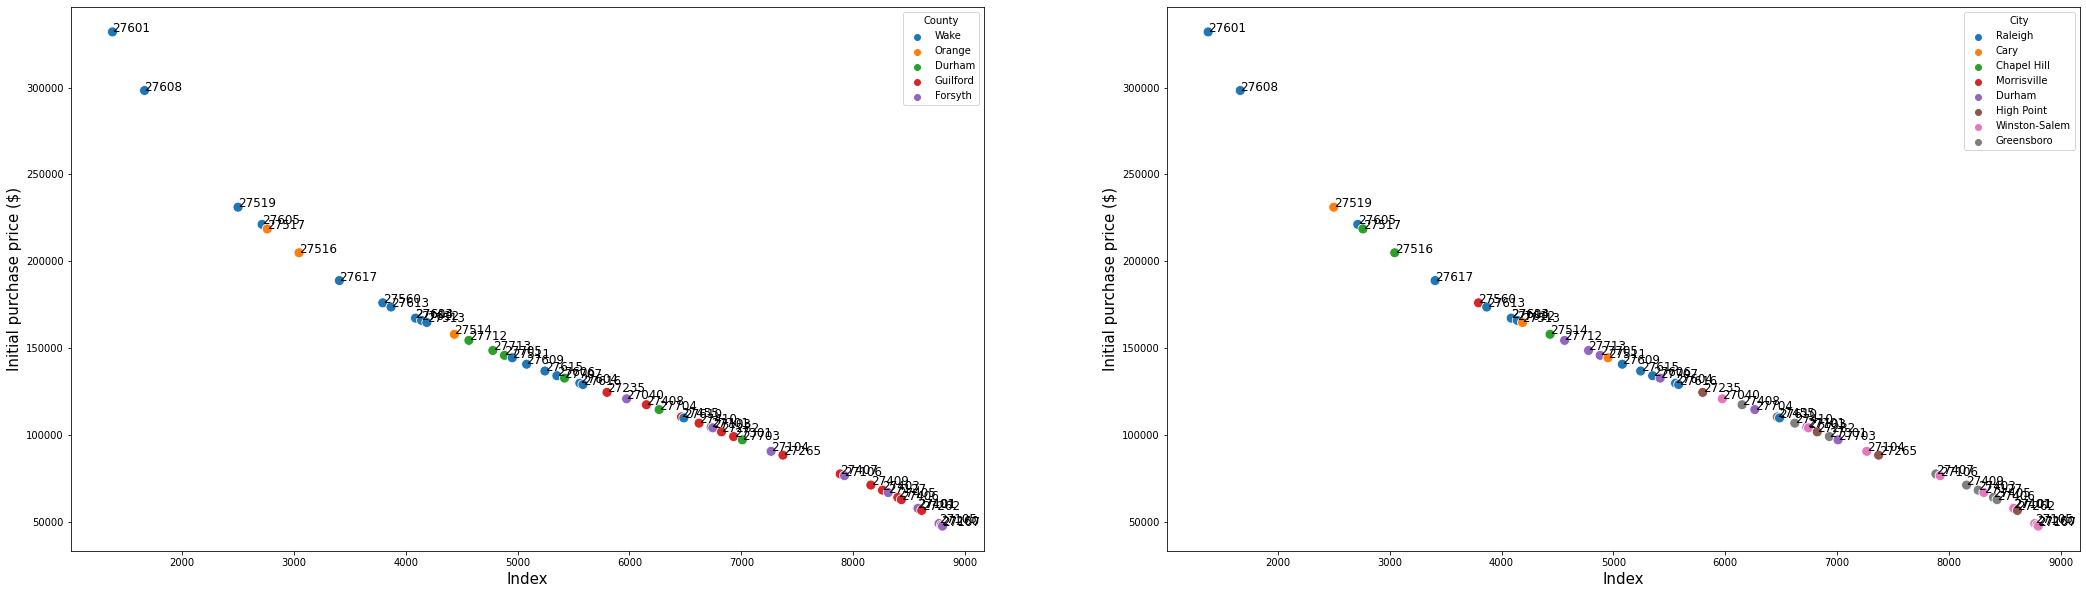

In [25]:
uni_scatterplot(df_zillow,'Price2017','Initial purchase price ($)')

In [26]:
df_zillow[['County','Price2017']].groupby('County').agg(['count','mean','median','std','sum'])['Price2017'].sort_values('mean')

,count,mean,median,std,sum
County,,,,,
Forsyth,8,76887.500000,71950.0,26593.792912,615100
Guilford,15,83873.333333,77800.0,24706.230176,1258100
Durham,7,128457.142857,132900.0,22877.343752,899200
Wake,18,178533.333333,166750.0,58891.735164,3213600
Orange,3,193933.333333,205000.0,31779.605620,581800


In [27]:
df_zillow[['City','Price2017']].groupby('City').agg(['count','mean','median','std','sum'])['Price2017'].sort_values('mean')

,count,mean,median,std,sum
City,,,,,
Winston-Salem,8,76887.500000,71950.0,26593.792912,615100
Greensboro,10,83760.000000,74600.0,22450.894563,837600
High Point,5,84100.000000,88600.0,31657.542545,420500
Durham,7,128457.142857,132900.0,22877.343752,899200
Morrisville,1,176200.000000,176200.0,NaN,176200
Raleigh,14,178335.714286,166750.0,64951.409141,2496700
Cary,3,180233.333333,164900.0,45290.433133,540700
Chapel Hill,3,193933.333333,205000.0,31779.605620,581800


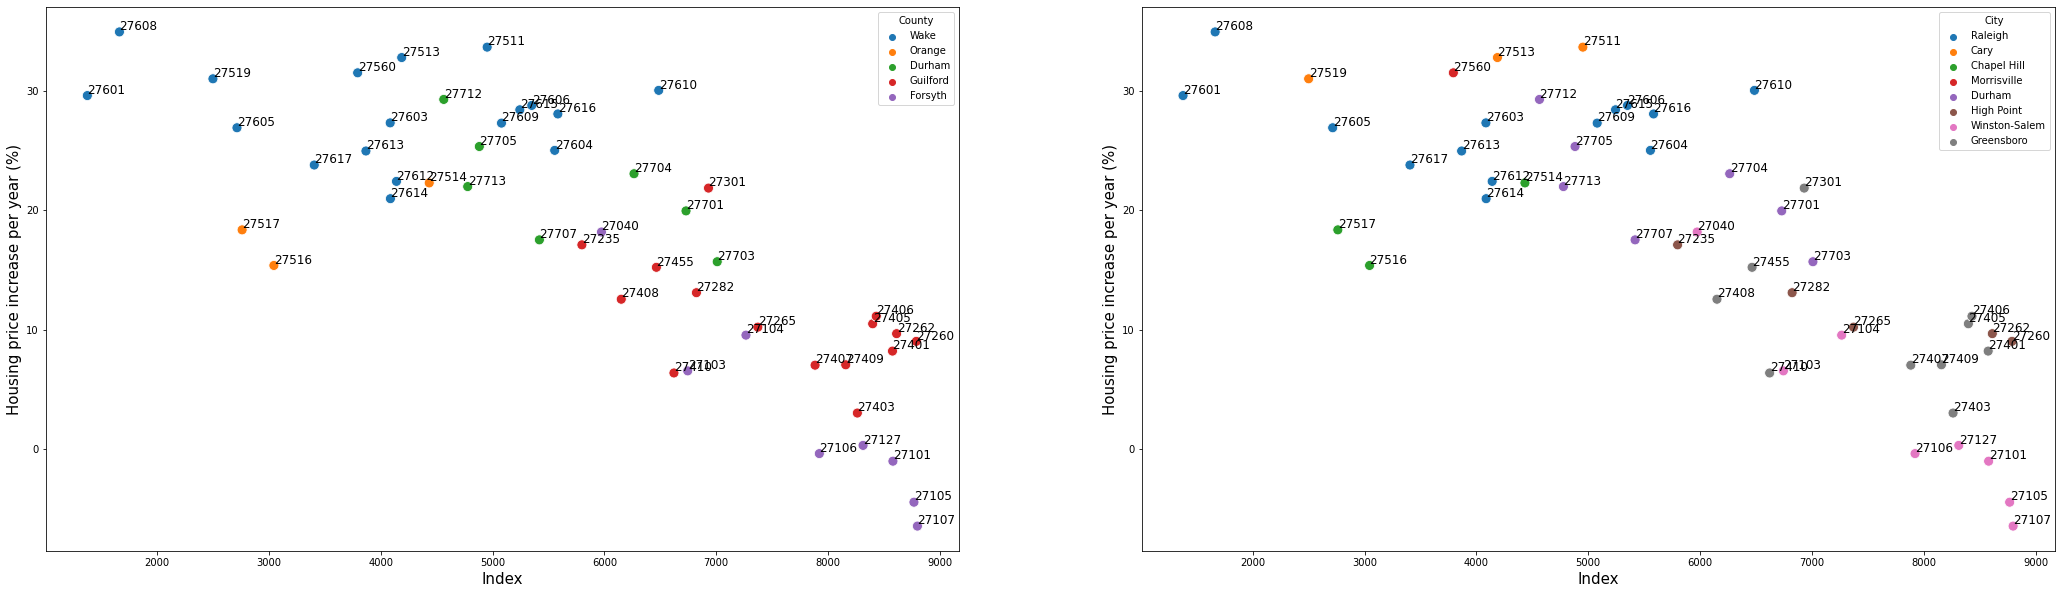

In [28]:
uni_scatterplot(df_zillow,'PriceIncreasePerc','Housing price increase per year (%)')

In [29]:
df_zillow[['County','PriceIncreasePerc']].groupby('County').agg(['count','mean','median','std','sum'])['PriceIncreasePerc'].sort_values('mean')

,count,mean,median,std,sum
County,,,,,
Forsyth,8,2.775196,-0.045076,8.148006,22.201567
Guilford,15,10.788887,10.199005,4.704180,161.833309
Orange,3,18.660303,18.344156,3.466235,55.980909
Durham,7,21.816017,21.967213,4.638759,152.712122
Wake,18,28.176519,28.222474,3.833058,507.177350


In [30]:
df_zillow[['City','PriceIncreasePerc']].groupby('City').agg(['count','mean','median','std','sum'])['PriceIncreasePerc'].sort_values('mean')

,count,mean,median,std,sum
City,,,,,
Winston-Salem,8,2.775196,-0.045076,8.148006,22.201567
Greensboro,10,10.280154,9.337384,5.348546,102.801544
High Point,5,11.806353,10.199005,3.338548,59.031765
Chapel Hill,3,18.660303,18.344156,3.466235,55.980909
Durham,7,21.816017,21.967213,4.638759,152.712122
Raleigh,14,27.020156,27.290660,3.520999,378.282181
Morrisville,1,31.492537,31.492537,NaN,31.492537
Cary,3,32.467544,32.769726,1.350549,97.402632


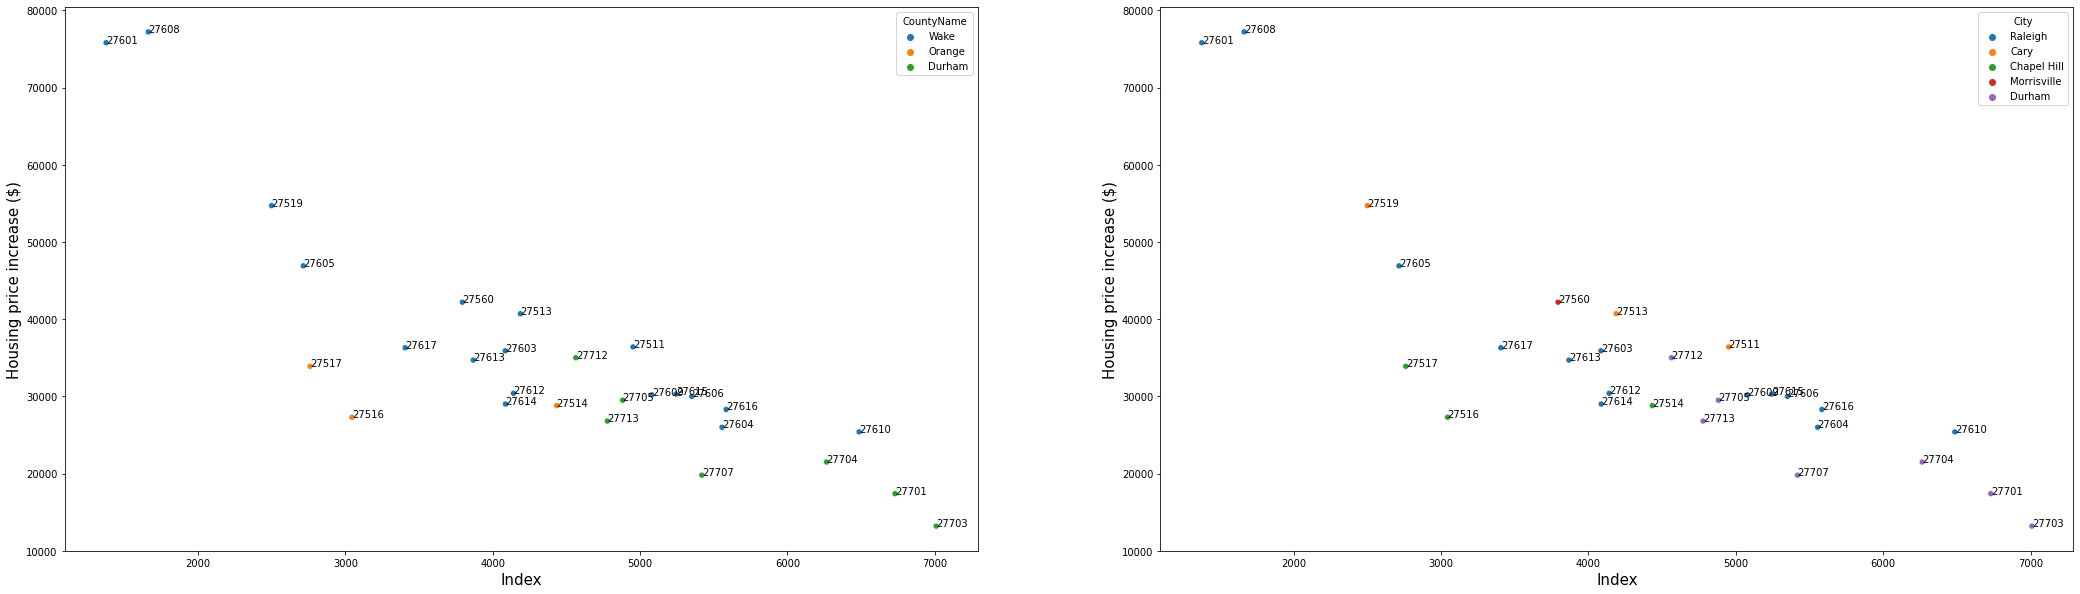

In [31]:
uni_scatterplot(df_zillow,'PriceIncrease','Housing price increase ($)')

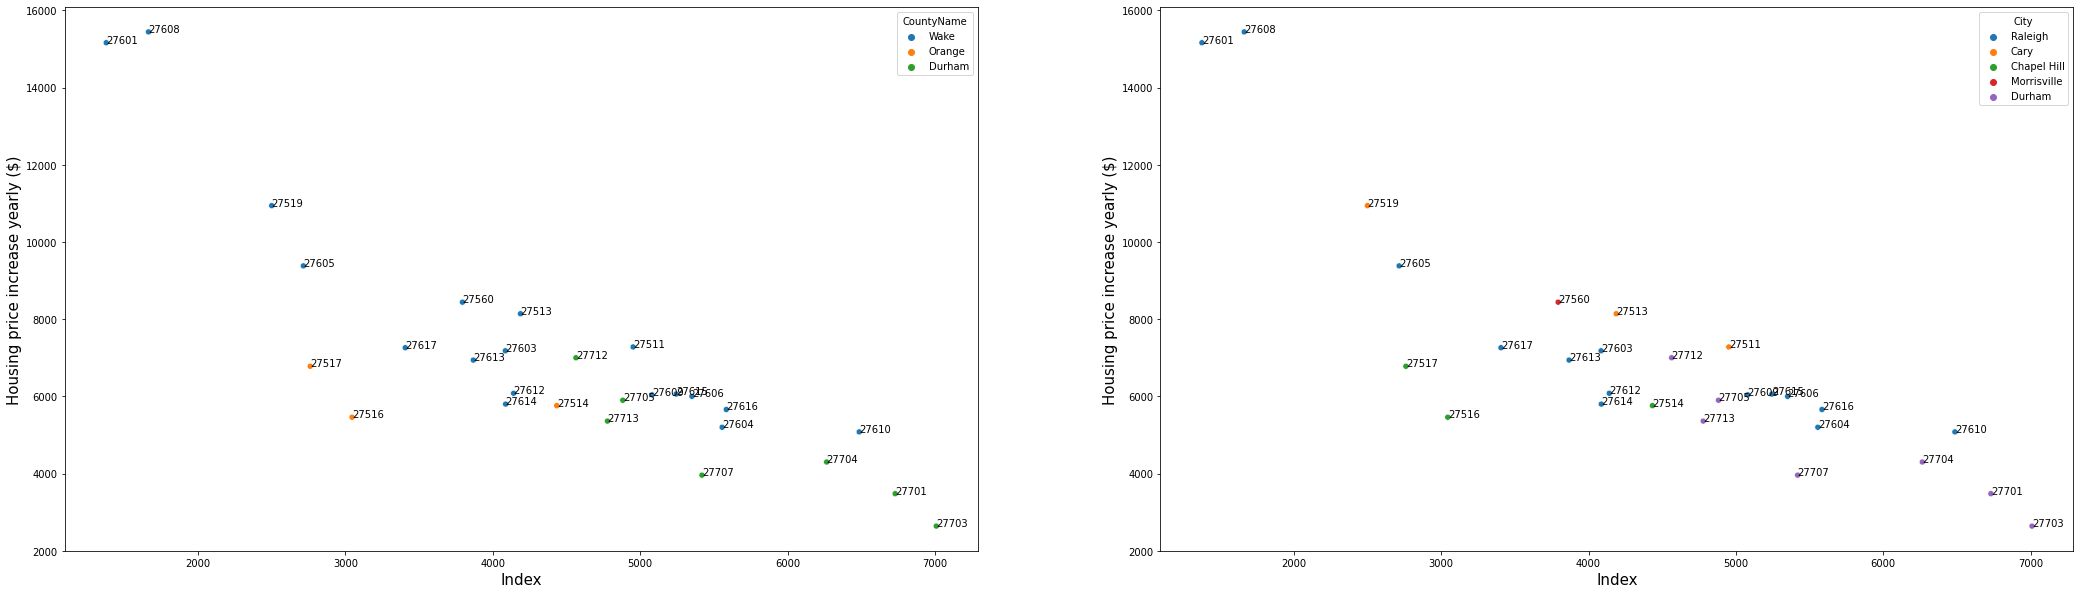

In [32]:
uni_scatterplot(df_zillow,'PriceIncreaseYearly','Housing price increase yearly ($)')